C:\Users\banut\AppData\Local\Temp\ipykernel_15184\4199951469.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


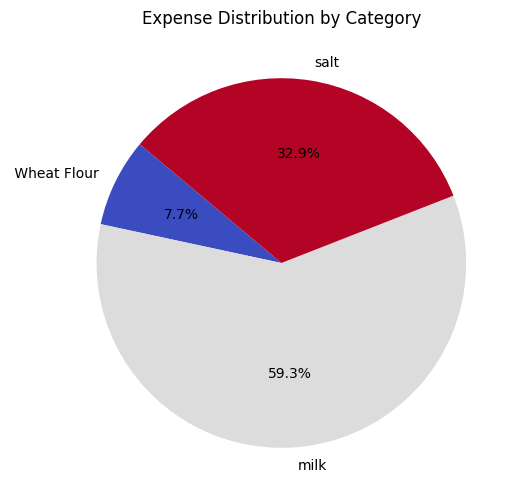

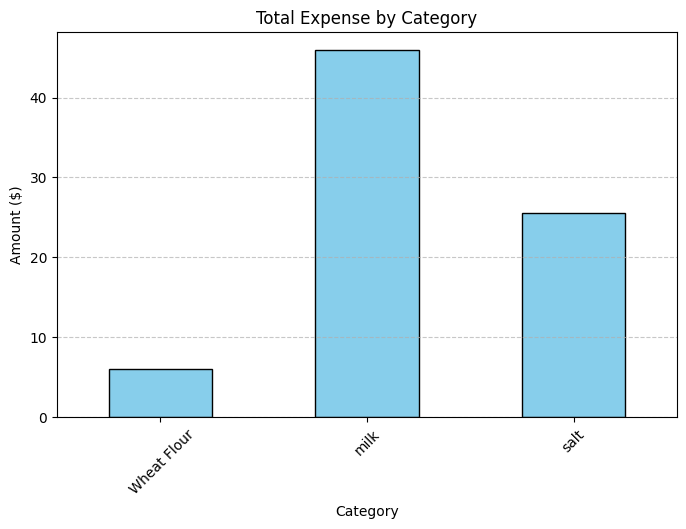

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Database connection details
DB_CONFIG = {
    "host": "localhost",
    "user": "root",
    "password": "54321",
    "database": "expense_db"
}

def fetch_expenses():
    """Fetches expenses from the database and returns a Pandas DataFrame."""
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        query = "SELECT category, amount FROM expenses"  # Removed 'date'
        df = pd.read_sql(query, conn)
        conn.close()
        return df
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        return None

def plot_expense_distribution(df):
    """Plots a pie chart of expense distribution by category."""
    category_sums = df.groupby("category")["amount"].sum()
    plt.figure(figsize=(8, 6))
    category_sums.plot.pie(autopct="%1.1f%%", startangle=140, cmap="coolwarm")
    plt.title("Expense Distribution by Category")
    plt.ylabel("")
    plt.show()

def plot_total_expense(df):
    """Plots a bar chart for total expenses per category."""
    category_sums = df.groupby("category")["amount"].sum()
    plt.figure(figsize=(8, 5))
    category_sums.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Total Expense by Category")
    plt.xlabel("Category")
    plt.ylabel("Amount ($)")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

def main():
    df = fetch_expenses()
    if df is not None and not df.empty:
        plot_expense_distribution(df)
        plot_total_expense(df)  # New visualization
    else:
        print("No expense data found!")

if __name__ == "__main__":
    main()
